In [1]:
#IMPORTS

In [2]:
import pandas as pd
import calendar
import datetime


from google.cloud import bigquery

from datetime import datetime
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
# Big Query Command to pull data
%load_ext google.cloud.bigquery

In [4]:
#plan b to run Big query from JN

In [5]:
from google.cloud import bigquery
client = bigquery.Client()


In [6]:
sql = """
SELECT date, app, business_type, platform, connection, ad_name, ad_format, impressions, ad_revenue, tier, country 
   FROM `wallpaperboard-6dd71.revenue.daily`
WHERE 
app = 'Zedge' AND 
platform = 'Android' AND
ad_revenue > 1.00 AND 
ad_name = 'Rewarded Video' AND
(date >= '2018-07-01' AND date <= '2018-12-31')

"""
rv = client.query(sql).to_dataframe()
rv.head()

,date,app,business_type,platform,connection,ad_name,ad_format,impressions,ad_revenue,tier,country
0,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,73,2.00,1,CA
1,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,69,1.45,2,DE
2,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,428,1.03,3,IN
3,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,602,15.86,1,US
4,2018-10-05,Zedge,Marketplace,Android,Marketplace,Rewarded Video,PM Reward Video,231,2.61,1,US


In [7]:
# GET MONTH AND YEAR
rv.date = pd.to_datetime(rv.date)

#q4_revenue_data.info()
rv['year'] = rv.date.dt.year
rv['month'] = rv.date.dt.month

#rv['mn_name'] = rv['month'].strftime("%B")

rv['mn_name'] = rv['month'].apply(lambda x: calendar.month_name[x])

#Ensure the Tier is a String
rv.tier = rv.tier.astype(str)

rv.head()

,date,app,business_type,platform,connection,ad_name,ad_format,impressions,ad_revenue,tier,country,year,month,mn_name
0,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,73,2.00,1,CA,2018,10,October
1,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,69,1.45,2,DE,2018,10,October
2,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,428,1.03,3,IN,2018,10,October
3,2018-10-05,Zedge,Marketplace,Android,Admob,Rewarded Video,PM Reward OW,602,15.86,1,US,2018,10,October
4,2018-10-05,Zedge,Marketplace,Android,Marketplace,Rewarded Video,PM Reward Video,231,2.61,1,US,2018,10,October


In [8]:
# TOTALS by Month for ecpm
rv_agg = rv.groupby(['month','mn_name', 'tier']).sum()

rv_agg['ecpm'] = rv_agg.ad_revenue / rv_agg.impressions * 1000

rv_agg

impressions  ad_revenue     year       ecpm
month mn_name   tier                                             
7     July      1           61524     1186.41   228034  19.283694
                2           15511      383.61   187674  24.731481
                3          278185      419.71   421762   1.508744
8     August    1           78541     1066.11   191710  13.573930
                2           12906      184.57   139242  14.301100
                3          200555      273.04   296646   1.361422
9     September 1           75308      886.30   223998  11.769002
                2            9559      113.92    76684  11.917565
                3          147706      191.65   234088   1.297510
10    October   1           99575     1770.44   409654  17.779965
                2           19280      206.54   179602  10.712656
                3          289476      458.25   486338   1.583033
11    November  1          216446     5889.48   768858  27.209928
                2           72652      786.03   464140  10.819110
                3          772742     2219.27  1186584   2.871942
12    December  1          395547    14272.20   966622  36.082185
                2          191765     2099.98   871776  10.950799
                3         1690583     5019.75  2060378   2.969242

In [9]:
rv_agg.reset_index(inplace = True)
rv_agg

rv_agg.loc[rv_agg.tier == '1', 'country'] = 'US & UK,CA,AU'
rv_agg.loc[rv_agg.tier == '2', 'country'] = 'Europe'
rv_agg.loc[rv_agg.tier == '3', 'country'] = 'Emerging Markets'

rv_agg

,month,mn_name,tier,impressions,ad_revenue,year,ecpm,country
0,7,July,1,61524,1186.41,228034,19.283694,"US & UK,CA,AU"
1,7,July,2,15511,383.61,187674,24.731481,Europe
2,7,July,3,278185,419.71,421762,1.508744,Emerging Markets
3,8,August,1,78541,1066.11,191710,13.573930,"US & UK,CA,AU"
4,8,August,2,12906,184.57,139242,14.301100,Europe
5,8,August,3,200555,273.04,296646,1.361422,Emerging Markets
6,9,September,1,75308,886.30,223998,11.769002,"US & UK,CA,AU"
7,9,September,2,9559,113.92,76684,11.917565,Europe
8,9,September,3,147706,191.65,234088,1.297510,Emerging Markets
9,10,October,1,99575,1770.44,409654,17.779965,"US & UK,CA,AU"


### GRAPHING Rewarded Video Growth by Month

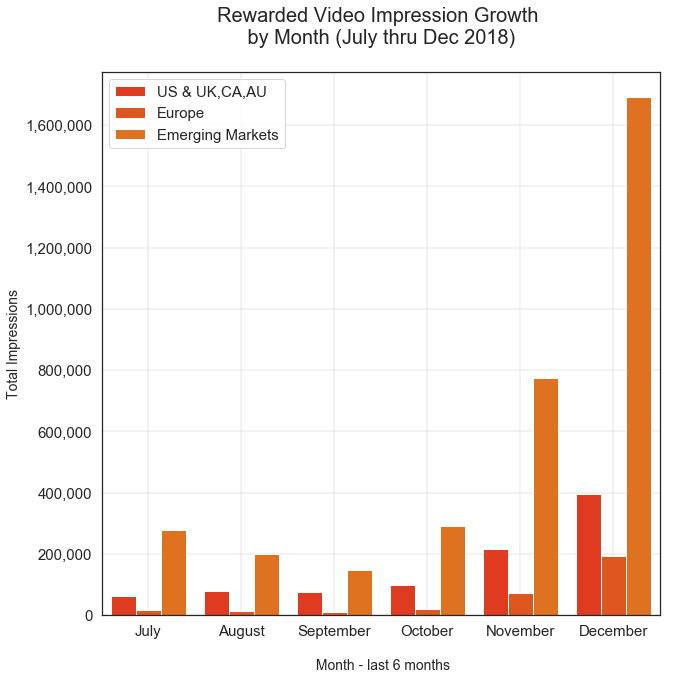

In [18]:



from matplotlib.ticker import FuncFormatter

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")

sns.set(rc={"font.size":14,"axes.labelsize":14})
# Rotate the labels on x-axis

sns.set_style('white')
sns.set_palette(sns.color_palette("autumn"))


ax = sns.barplot(x ='mn_name', y='impressions', hue='country', data=rv_agg)


plt.title("Rewarded Video Impression Growth \n by Month (July thru Dec 2018) \n", fontsize=20)
plt.xlabel('\n Month - last 6 months')
plt.ylabel('Total Impressions' )
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y))) 
ax.grid(linestyle='-', linewidth='0.2', color='gray')

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# 5. Place legend to the right
#plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.savefig('2018_Last6months_RV.png', dpi=200)



# plt.figure(figsize=(15,8))
# ax = sns.barplot(x="Word", y="Frequency", data=boxdata)



In [11]:
## Interstitial eCPMs by Tier

In [12]:
sql = """
SELECT date, app, business_type, platform, connection, ad_name, ad_format, impressions, ad_revenue, tier, country 
   FROM `wallpaperboard-6dd71.revenue.daily`
WHERE 
app = 'Zedge' AND 
platform = 'Android' AND
ad_revenue > 1.00 AND 
ad_name = 'Interstitial' AND
((date >= '2018-10-01' AND date <= '2018-12-31') OR
(date >= '2017-10-01' AND date <= '2017-12-31'))

"""

fs= client.query(sql).to_dataframe()
fs.head()

,date,app,business_type,platform,connection,ad_name,ad_format,impressions,ad_revenue,tier,country
0,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,445,4.91,1,CA
1,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4030,4.98,3,IN
2,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4121,6.92,3,IT
3,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,2992,1.95,3,PL
4,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4562,4.59,3,TR


In [13]:
fs.date = pd.to_datetime(fs.date)

#q4_revenue_data.info()
fs['year'] = fs.date.dt.year
fs['month'] = fs.date.dt.month


fs['mn_name'] = fs['month'].apply(lambda x: calendar.month_name[x])

#Ensure the Tier is a String
fs.tier = fs.tier.astype(str)

fs.head()

,date,app,business_type,platform,connection,ad_name,ad_format,impressions,ad_revenue,tier,country,year,month,mn_name
0,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,445,4.91,1,CA,2018,10,October
1,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4030,4.98,3,IN,2018,10,October
2,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4121,6.92,3,IT,2018,10,October
3,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,2992,1.95,3,PL,2018,10,October
4,2018-10-10,Zedge,UGC,Android,inMobi,Interstitial,320x480,4562,4.59,3,TR,2018,10,October


In [14]:
#Calculate aggregate eCPM

fs_agg = fs.groupby(['year','month','mn_name','tier']).sum()

fs_agg['ecpm']= fs_agg.ad_revenue /fs_agg.impressions * 1000

fs_agg
fs_agg.reset_index(inplace=True)

fs_agg

,year,month,mn_name,tier,impressions,ad_revenue,ecpm
0,2017,10,October,1,23522767,224018.72,9.523485
1,2017,10,October,2,10083624,43545.02,4.318390
2,2017,10,October,3,43237682,54674.70,1.264515
3,2017,11,November,1,24853578,262197.20,10.549676
4,2017,11,November,2,9473326,44392.27,4.686028
5,2017,11,November,3,44397683,60035.31,1.352217
6,2017,12,December,1,23402830,276786.79,11.827065
7,2017,12,December,2,10572489,52355.10,4.952013
8,2017,12,December,3,50486612,75018.07,1.485900
9,2018,10,October,1,16827902,158451.04,9.415971


In [15]:
fs_dec = fs_agg.loc[fs_agg.month == 12]

fs_dec.loc[fs_agg.tier == '1', 'country'] = 'US & UK,CA,AU'
fs_dec.loc[fs_agg.tier == '2', 'country'] = 'Europe'
fs_dec.loc[fs_agg.tier == '3', 'country'] = 'Emerging Markets'

fs_dec.loc[fs_agg.year == 2018, 'timep'] = 'December 2018'
fs_dec.loc[fs_agg.year == 2017, 'timep'] = 'December 2017'

t_2018 = fs_dec.loc[fs_agg.year == 2018]
t_2017 = fs_dec.loc[fs_agg.year == 2017]

frames = [t_2018,t_2017]

fs_ecpms = pd.concat(frames)

/Users/deeannbelsky/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/deeannbelsky/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Full Screen Ad TY /LY Comparison

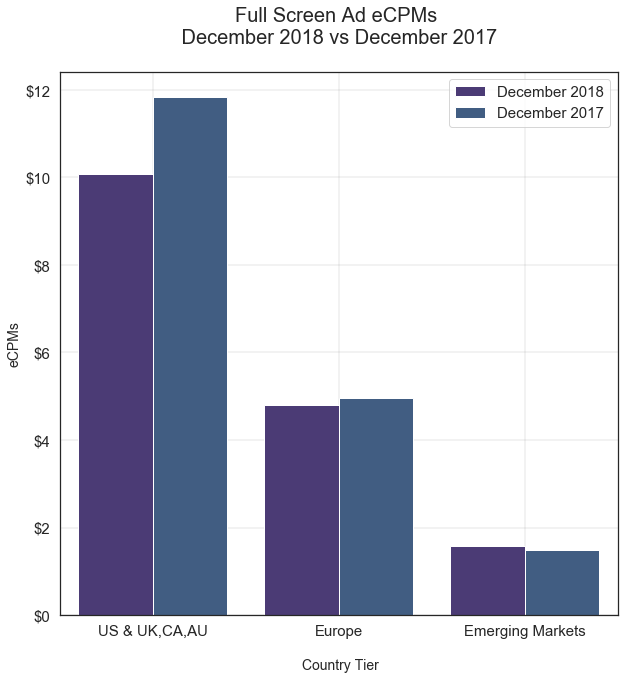

In [17]:


from matplotlib.ticker import FuncFormatter

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")

sns.set(rc={"font.size":14,"axes.labelsize":14})
# Rotate the labels on x-axis

sns.set_style('white')
sns.set_palette(sns.color_palette("viridis"))


ax = sns.barplot(x ='country', y='ecpm', hue='timep', data=fs_ecpms)


plt.title("Full Screen Ad eCPMs \n December 2018 vs December 2017 \n", fontsize=20)
plt.xlabel('\n Country Tier')
plt.ylabel('eCPMs' )
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.0f}'.format(y))) 
ax.grid(linestyle='-', linewidth='0.2', color='gray')

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# 5. Place legend to the right
#plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=20)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('2018-2017_Full_Screen_eCPM.png', dpi=200)



# plt.figure(figsize=(15,8))
# ax = sns.barplot(x="Word", y="Frequency", data=boxdata)
